In [1]:
import pandas as pd
%matplotlib inline

In [2]:
from sklearn import tree

In [3]:
from sklearn import datasets

In [28]:
from pandas.tools.plotting import scatter_matrix

In [41]:
import matplotlib.pyplot as plt

In [5]:
iris = datasets.load_iris() # load iris data set

In [6]:
x = iris.data[:,2:] # the attributes
y = iris.target # the target variable

<img src="images/iris_scatter.png" height="500" width="500">

In [8]:
dt = tree.DecisionTreeClassifier()

In [9]:
dt = dt.fit(x,y)

## Now what?

In [16]:
from sklearn.externals.six import StringIO
import pydotplus #pip install pydotplus

In [17]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(dt, out_file=f)

In [18]:
import os
os.unlink('iris.dot')

In [61]:
dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data) #brew install graphviz
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf") 

True

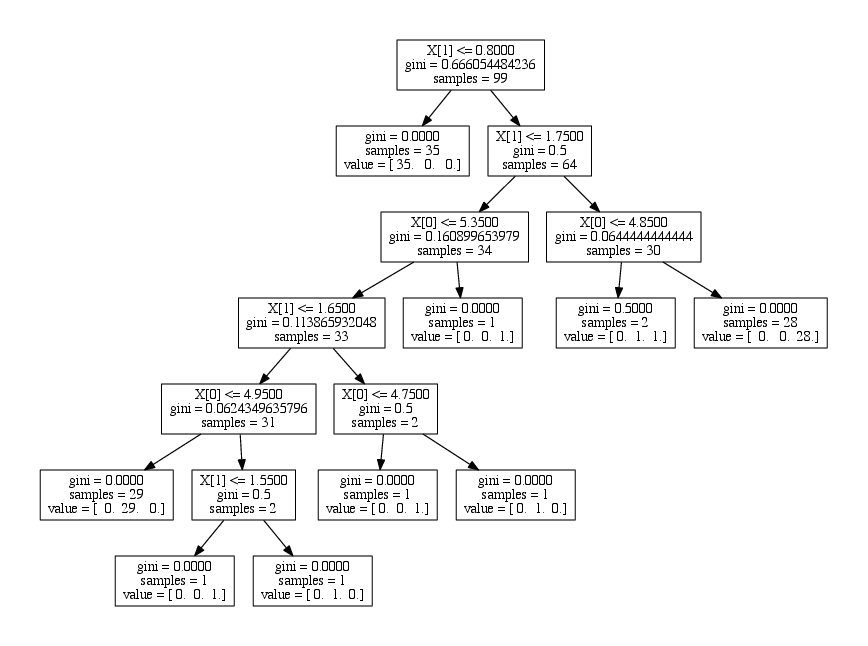

In [62]:
# from http://stackoverflow.com/questions/19470099/view-pdf-image-in-an-ipython-notebook
from wand.image import Image as WImage #pip install wand; brew install freetype imagemagick
img = WImage(filename='iris.pdf')
img

###Let's actually do some testing of our model

In [32]:
from sklearn.cross_validation import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,train_size=0.66)

In [56]:
dt = dt.fit(x_train,y_train)

In [38]:
from sklearn import metrics

In [47]:
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n"
    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y,y_pred),"\n"
    if show_confussion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y,y_pred),"\n"

In [51]:
measure_performance(x_train,y_train,dt)

Accuracy:0.990 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       0.97      1.00      0.98        32
          2       1.00      0.97      0.98        32

avg / total       0.99      0.99      0.99        99


Confusion matrix
[[35  0  0]
 [ 0 32  0]
 [ 0  1 31]] 



In [52]:
measure_performance(x_test,y_test,dt)

Accuracy:0.980 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.94      1.00      0.97        17
          2       1.00      0.94      0.97        18

avg / total       0.98      0.98      0.98        50


Confusion matrix
[[15  0  0]
 [ 0 17  0]
 [ 0  1 17]] 



In [53]:
from sklearn.cross_validation import cross_val_score

In [59]:
# http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics
scores = cross_val_score(dt,x_test,y_test,cv=10)

In [60]:
scores

array([ 1. ,  1. ,  0.8,  0.8,  1. ,  1. ,  1. ,  0.8,  1. ,  1. ])